In [3]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
titanic_data = pd.read_csv('titanic/train.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titanic_data.shape

(891, 12)

In [9]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived

In [10]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [10]:
X = pd.get_dummies(X) # носинативные переменные превращает в числовые

In [14]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,False,True
4,3,35.0,0,0,8.0500,False,True,False,False,True


In [11]:
# заполняем пропущенные значения
X = X.fillna({'Age': X.Age.median()})

In [16]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [23]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [24]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

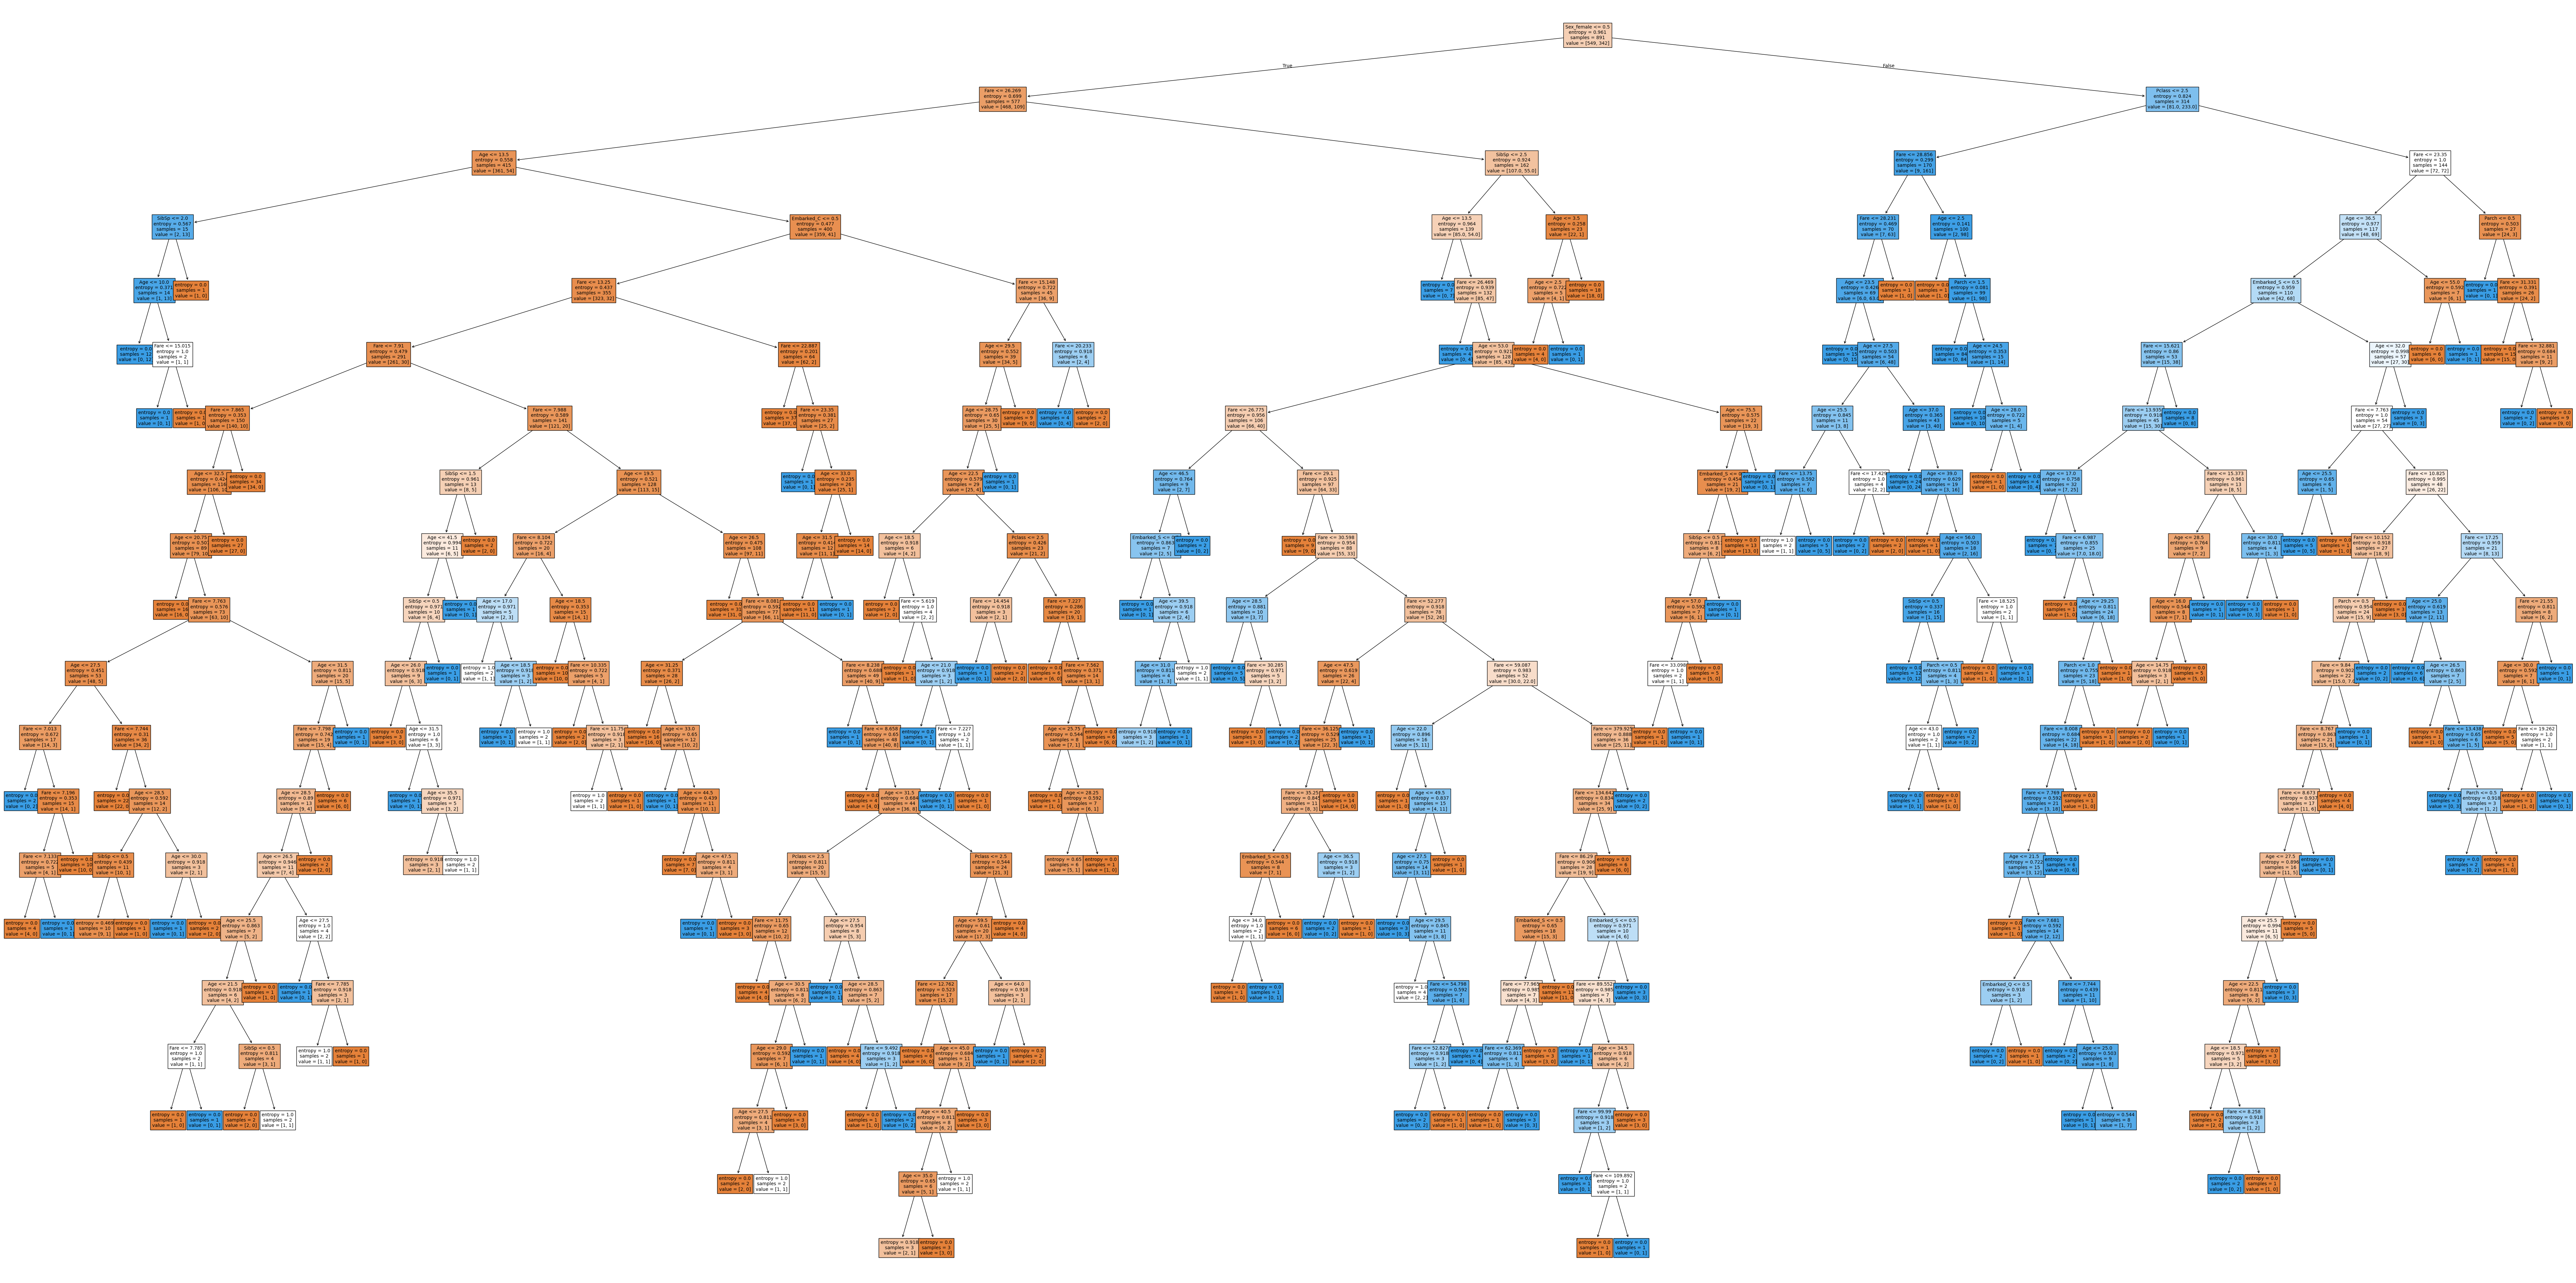

In [26]:
plt.figure(figsize=(100, 50))
tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [36]:
clf.score(X_test, y_test)

0.7830508474576271

In [37]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [38]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [39]:
clf.score(X_train, y_train)

0.8406040268456376

In [41]:
clf.score(X_test, y_test)

0.8067796610169492

In [45]:
max_depth_values = range(1, 100)

In [46]:
scores_data = pd.DataFrame()

In [48]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score]})
    
    scores_data = pd.concat([scores_data, temp_score_data])

In [49]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.810169


In [52]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], 
                           value_vars=['train_score', 'test_score'], 
                           var_name='set_type',
                           value_name='score')

In [53]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


<Axes: xlabel='max_depth', ylabel='score'>

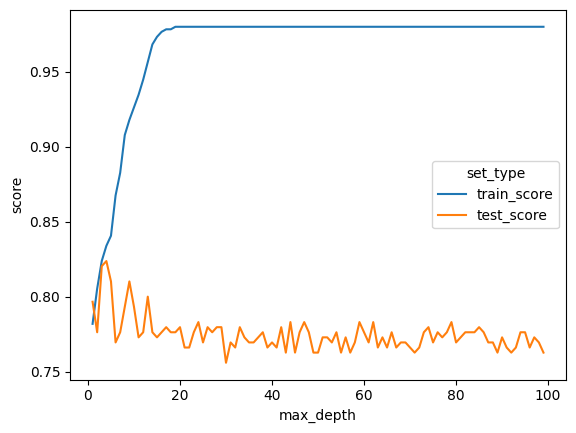

In [54]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [57]:
cross_val_score(clf, X_train, y_train, cv=5)

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

In [58]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7886274509803922

In [59]:
scores_data = pd.DataFrame()

In [60]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    
    scores_data = pd.concat([scores_data, temp_score_data])

In [61]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.795350


In [62]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], 
                           value_vars=['train_score', 'test_score', 'cross_val_score'], 
                           var_name='set_type',
                           value_name='score')

In [63]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


<Axes: xlabel='max_depth', ylabel='score'>

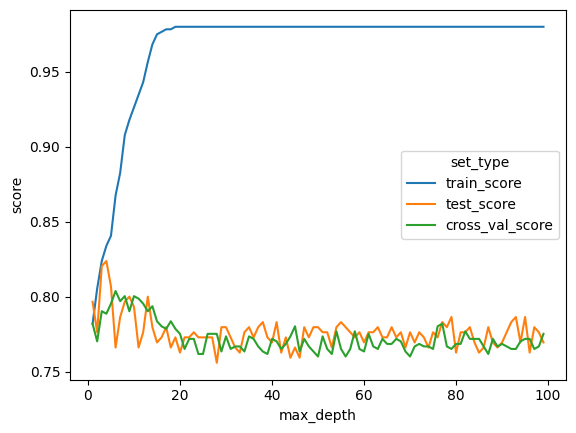

In [64]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [65]:
scores_data_long.query('set_type == "cross_val_score"').head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.795350
203,6,cross_val_score,0.803754
204,7,cross_val_score,0.797017
205,8,cross_val_score,0.800364
206,9,cross_val_score,0.790266
207,10,cross_val_score,0.800350


In [66]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [67]:
cross_val_score(clf, X_test, y_test, cv=5).mean()

0.7932203389830509

In [68]:
best_clf.fit(X_train, y_train)
best_clf.score(X_test, y_test)

0.8

In [4]:
clf = tree.DecisionTreeClassifier()

In [17]:
clf.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'monotonic_cst': None}

In [1]:
from sklearn.model_selection import GridSearchCV

In [5]:
parameters = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

In [6]:
grid_search_cv_clf = GridSearchCV(clf, parameters, cv=5)

In [13]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [14]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [18]:
best_clf = grid_search_cv_clf.best_estimator_

In [20]:
best_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [21]:
best_clf.score(X_test, y_test)

0.8

In [26]:
from sklearn.metrics import precision_score, recall_score

In [23]:
y_pred = best_clf.predict(X_test)

In [24]:
precision_score(y_test, y_pred)

0.8279569892473119

In [27]:
recall_score(y_test, y_pred)

0.6416666666666667

In [28]:
y_predicted_prob = best_clf.predict_proba(X_test)

<Axes: >

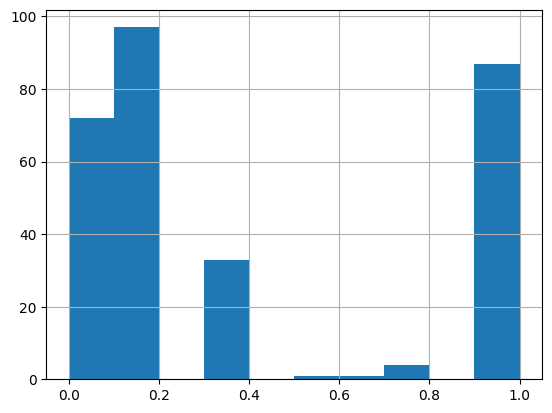

In [31]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [37]:
import numpy as np
new_y_pred = np.where(y_predicted_prob[:,1] > 0.8, 1, 0)

In [38]:
precision_score(y_test, new_y_pred)

0.8390804597701149

In [39]:
recall_score(y_test, new_y_pred)

0.6083333333333333

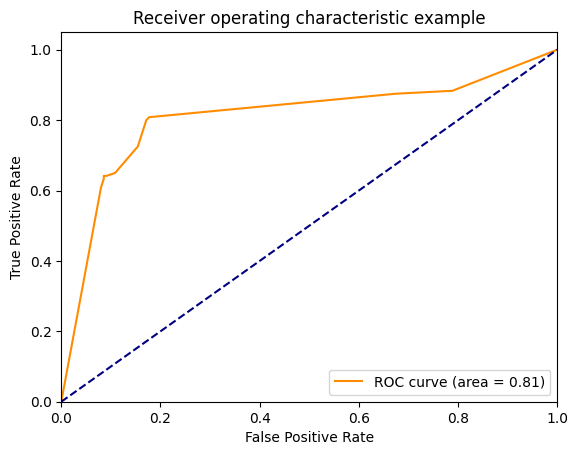

In [43]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
          label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()